**1. Dataset Preparation and Cleaning**

---



In [1]:
## Import libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Import dataset Online Retail
data = pd.read_csv('Online_Retail.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/11 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/11 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/11 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/11 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/11 10:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
499423,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
499424,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
499425,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
499426,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [3]:
## Show how many columns and rows in dataset Online Retail
data.shape

## 499428 rows and 8 columns

(499428, 8)

In [4]:
## Show how many missing values for each column
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1329
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     119449
Country             0
dtype: int64

In [5]:
## Drop CustomerID rows that contains NA value
data = data.dropna(subset=['CustomerID'])
data.shape

## 379979 rows and 8 columns

(379979, 8)

In [6]:
## Convert InvoiceDate data type from str to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
## Show summary of DataFrame (consists name of columns, non-null values, data type, etc)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379979 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  float64       
 7   Country      379979 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.1+ MB


**2. Create A Cohort and Conduct Cohort Analysis**

---



In [8]:
## Create column InvoiceMonth and CohortMonth
## InvoiceMonth --> the day and time when each transaction was generated
## CohortMonth --> the first month for the specific user ID when that user shopped at this online retailer
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-01,2011-01-01
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-01,2011-01-01
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-01,2011-01-01
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-01,2011-01-01
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-01,2011-01-01
...,...,...,...,...,...,...,...,...,...,...
499423,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
499424,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
499425,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
499426,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01


In [9]:
## Create column CohortRange
## CohortRange --> the month difference between invoice month and cohort month for each row
def get_date(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

invoice_year, invoice_month, invoice_day = get_date(data, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date(data, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
data['CohortRange'] = year_diff * 12 + month_diff + 1

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortRange
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-01,2011-01-01,1
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-01,2011-01-01,1
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-01,2011-01-01,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-01,2011-01-01,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-01,2011-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
499423,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
499424,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
499425,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
499426,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5


In [10]:
## Cohort Analysis User Number and Retention Rate
cohort_analysis = data.groupby(['CohortMonth', 'CohortRange'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_analysis = cohort_analysis.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortRange',
                                       values = 'CustomerID')
cohort_analysis

CohortRange,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2011-01-01,783.0,299.0,346.0,305.0,359.0,339.0,314.0,311.0,347.0,340.0,413.0,224.0
2011-02-01,499.0,144.0,125.0,169.0,158.0,139.0,152.0,169.0,157.0,184.0,74.0,NaN
2011-03-01,530.0,109.0,144.0,128.0,123.0,104.0,151.0,131.0,165.0,57.0,NaN,NaN
2011-04-01,360.0,90.0,90.0,86.0,78.0,88.0,90.0,105.0,33.0,NaN,NaN,NaN
2011-05-01,317.0,73.0,57.0,58.0,73.0,80.0,87.0,34.0,NaN,NaN,NaN,NaN
2011-06-01,263.0,56.0,48.0,67.0,63.0,89.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-07-01,218.0,45.0,47.0,53.0,58.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,184.0,47.0,47.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,313.0,93.0,104.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


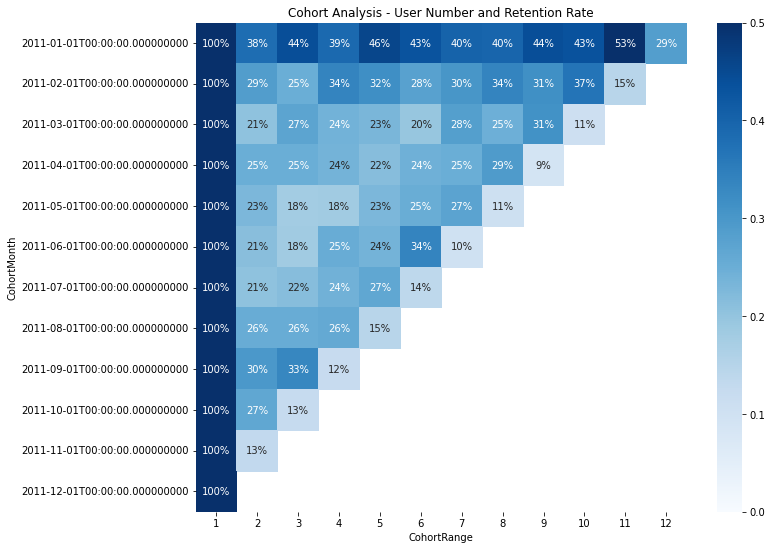

In [11]:
## Visualize Cohort Analysis User Number and Retention Rate
cohort_size = cohort_analysis.iloc[:,0]
retention = cohort_analysis.divide(cohort_size, axis = 0)
retention.round(3) * 100

plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - User Number and Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "Blues")
plt.show()

## It can be seen from the table of cohort analysis that in November 2011 there was a decrease in the number of customers (only 13% customers retain with us until 2 months). 
## Marketing analysis or product analysts may be able to look back at what promotional strategies were used for customers in January 2011 (29% customers retain with us until 12 months),
## where the percent number of customers in that month was quite high and stable.

**3. Deep Dive Analysis**

In [49]:
## Total Monthly Active Users
monthly_active = data.groupby(['InvoiceMonth'])[['CustomerID']].nunique().reset_index()
monthly_active

,InvoiceMonth,CustomerID
0,2011-01-01,783
1,2011-02-01,798
2,2011-03-01,1020
3,2011-04-01,899
4,2011-05-01,1079
5,2011-06-01,1051
6,2011-07-01,993
7,2011-08-01,980
8,2011-09-01,1302
9,2011-10-01,1425


Text(0.5, 1.0, 'Total Monthly Active Users')

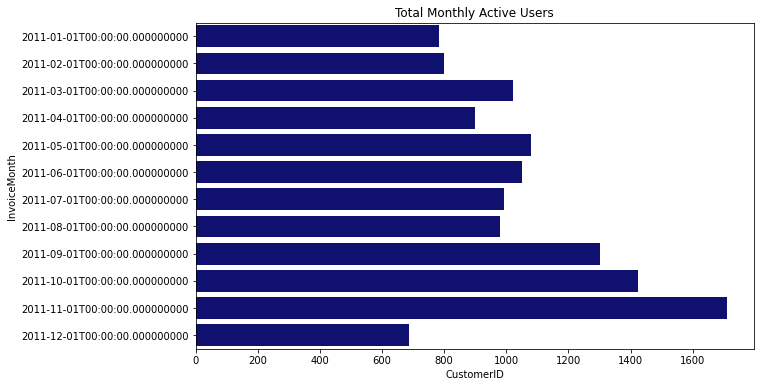

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='CustomerID', y='InvoiceMonth', data=monthly_active, ax=ax, color='navy').set_title('Total Monthly Active Users')

## Based on the results of visualization of total monthly active users that in November 2011 
## has the highest total active users compared to other months
## Even though in November 2011 the retention rate decreased but total active users in November 2011 was the highest.

In [35]:
## Total Monthly Order
monthly_order = data.groupby(['InvoiceMonth'])[['Quantity']].sum().reset_index()
monthly_order

,InvoiceMonth,Quantity
0,2011-01-01,269379
1,2011-02-01,262833
2,2011-03-01,344012
3,2011-04-01,278585
4,2011-05-01,367852
5,2011-06-01,356922
6,2011-07-01,363418
7,2011-08-01,386612
8,2011-09-01,537496
9,2011-10-01,569666


Text(0.5, 1.0, 'Total Monthly Order')

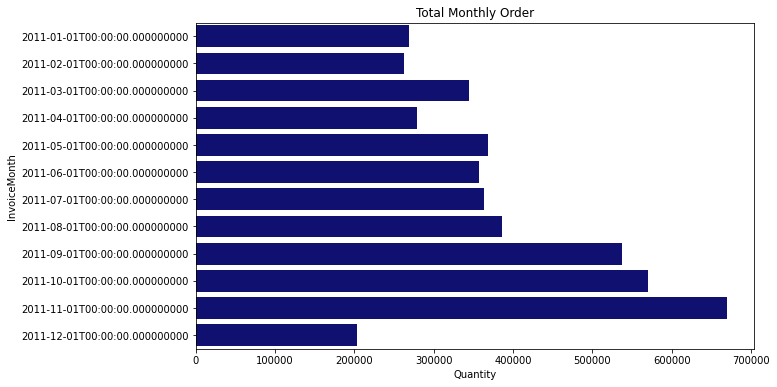

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Quantity', y='InvoiceMonth', data=monthly_order, ax=ax, color='navy').set_title('Total Monthly Order')

## Based on the results of visualization of total monthly orders that in November 2011 
## has the highest total monthly orders compared to other months
## Even though in November 2011 the retention rate decreased but total monthly order in November 2011 was the highest.